
### Dataset: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
from skimage.filters import threshold_otsu
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow import keras
import tensorflow as tf

# Reading Images

In [ ]:
malaria_img = []
uninfected_img = []

for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/images/parasites/*.png'):
  malaria_img.append(cv2.imread(img))

  
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/images/uninfected/*.png'):
  uninfected_img.append(cv2.imread(img))
  

In [ ]:
def showImage(img, title='image'):
  """
  Show the Image

  Parameters
  ------------------

  img (ndarray.numpy): Image to show
  title (str): Title of image
              default = 'image'

  """
  plt.imshow(img)
  plt.title(title)
  plt.show()

def plot_comparison(original, filtered, title_filtered):
    """
    Plot 2 images horizontally

    Parameters
    ----------------------

    original (ndarray.numpy): original Image
    filtered (ndarray.numpy): filtered Image
    title_filtered (str): filtered image title

    """

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

# Images RGB distribution
def getImageColorDistribution(img):
    """
    Funtions will return the color distribution of image
    Parameters
    ---------------

    img (ndarray.numpy): Image
    
    Returns
    ---------------

    Tuple
    """
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    return (red,green,blue)

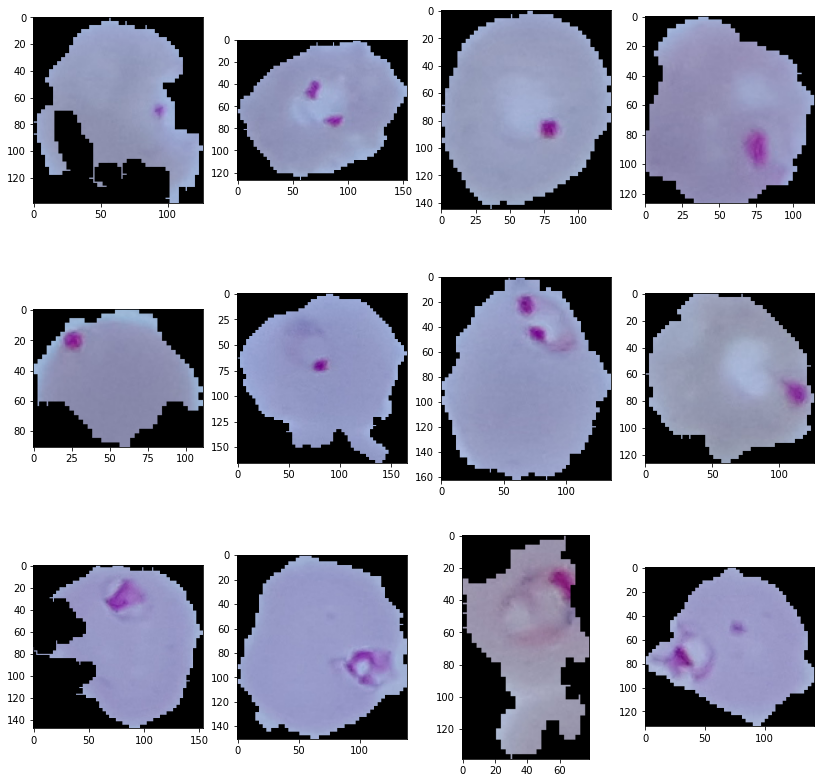

In [ ]:
# Malaria Infected Images
plt.figure(figsize = (14,14))
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(malaria_img[i])


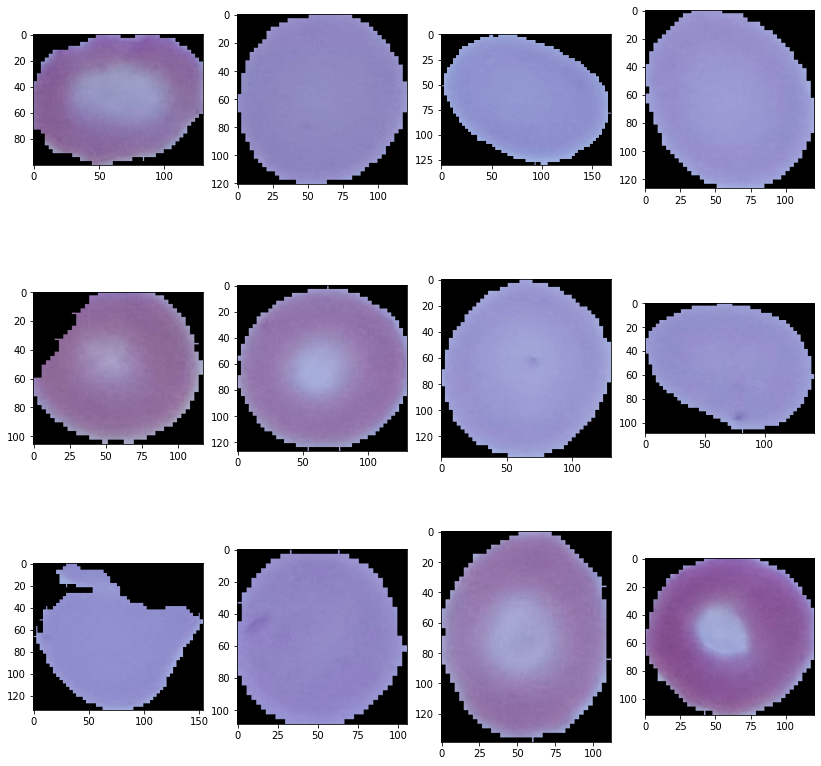

In [ ]:
# UnInfected Images
plt.figure(figsize = (14,14))
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(uninfected_img[i])


In [ ]:
red, green, blue = getImageColorDistribution(malaria_img[0])

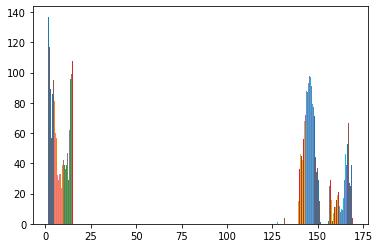

In [ ]:
# Red channel distribution
plt.hist(red)
plt.show()

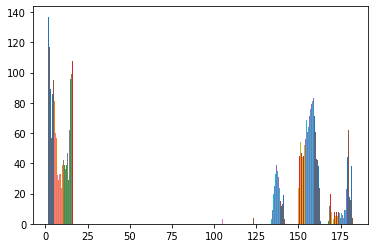

In [ ]:
# Green channel distribution

plt.hist(green)
plt.show()

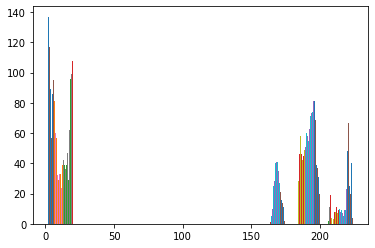

In [ ]:
# Blue channel distribution

plt.hist(blue)
plt.show()

# Image Segmetation using Threshold Technique

In [ ]:
def BinarizeImage(img,title='Image'):
  """"
  Description: Segmenting image by using Threshold technique

  Parameters
  --------------------

  img (ndarray.numpy): cell image
  title (str): Title of the Image
               deafult = Image
  """
  thresh = threshold_otsu(img)
  bi = img > thresh
  bi.astype(np.uint8)
  return bi*255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (139, 79, 3) looks like an RGB image
  if sys.path[0] == '':


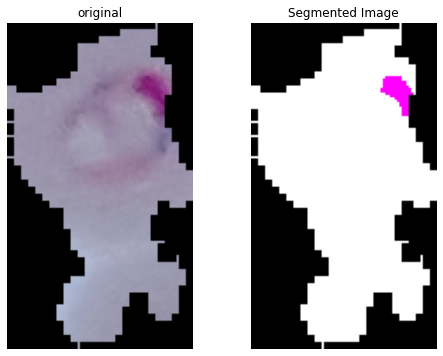

In [ ]:
bi_img  = BinarizeImage(malaria_img[10],'BinaryImages')
plot_comparison(malaria_img[10],bi_img,'Segmented Image')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (157, 151, 3) looks like an RGB image
  if sys.path[0] == '':


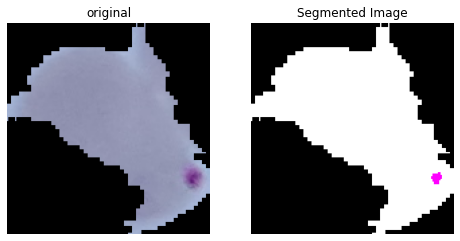

In [ ]:
bi_img  = BinarizeImage(malaria_img[60],'BinaryImages')
plot_comparison(malaria_img[60],bi_img,'Segmented Image')

In [ ]:
target = []
images = []
t=1

"""
 1) Reading the images from directory
 2) Resizing the images (50,50,3)
 3) convert the image into array
 4) Store in images variable
 5) target contains the label
       1: Infected , 0: Uninfected
 6) Convert the images into ndarray.numpy
"""
for path in ['parasites','uninfected']:
  for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/images/'+path+"/*.png"):
    img = cv2.imread(img)
    img_resize = cv2.resize(img, (60, 60))
    img_array = img_to_array(img_resize)
    images.append(img_array)
    target.append(t)

  t=0

X = np.array(images)
y= np.array(target)

# Reshaping the Images

In [ ]:
"""
Reshaping images into (10800,1 )
"""
data = []
for i in range(len(X)):
  data.append(X[i].reshape(60*60*3,1))
data = np.array(data)

# Prepare the Dataset for Modeling



In [ ]:
"""
Scale the images array dividing it withh 255
"""
data_scale = data/255

In [ ]:
data_scale[0].shape

(10800, 1)

In [ ]:
"""
Reshape the images into 1D-array

"""
data_scale = data_scale.reshape(len(data_scale),10800).astype(float)

In [ ]:
def build_model(base_estimator, X, y):
  
  """
  Description: Train the given model and  print its accuracy confusion matrix and classification report

  Parameters:
  ------------------------

  base_estimator: Given Model
  X (ndarray.numpy) | (DataFrame): Training Dataset
  y (ndarray.numpy) | (DataFrame): Target Variable


  Returns:
  -------------------------
    None
  
  """
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, shuffle=True)
  base_estimator.fit(X,y)
  y_pred = base_estimator.predict(X_test)

  print('Accuracy on test_set: ', accuracy_score(y_test, y_pred))
  print('\n')
  

  print('Accuracy on training set: ', accuracy_score(y_train,base_estimator.predict(X_train)))
  print('\n')

  cf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_mat, annot=True)
  plt.show()

  print('\n')

 
  print('\n')
  
  print(classification_report(y_test, y_pred))

Accuracy on test_set:  0.9941763727121464


Accuracy on training set:  0.9917915774446824




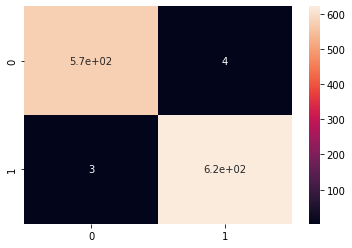





              precision    recall  f1-score   support

           0       0.99      0.99      0.99       578
           1       0.99      1.00      0.99       624

    accuracy                           0.99      1202
   macro avg       0.99      0.99      0.99      1202
weighted avg       0.99      0.99      0.99      1202



In [ ]:
build_model(SVC(kernel='rbf',C=10),data_scale,y)

# From the Above statistics we can say that Model is overfitting 

# KNN and evaluating Best K

In [ ]:
"""
Try to find the best K for KNN algorithm

"""

k = []
scores = []
# here i use range 21 because  It is a good idea to try many different values for K (e.g. values from 1 to 21)
#https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/

X_train, X_test, y_train, y_test = train_test_split(data_scale, y, test_size= 0.3, random_state= 42, shuffle=True)

for i in range(3,21):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  score = clf.score(X_test,y_test)
  scores.append(score)
  k.append(i) 

In [ ]:
k

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

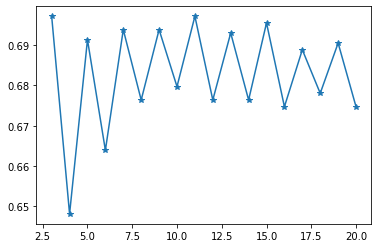

In [ ]:
plt.plot(k,scores,marker='*')
plt.show()

# From the above graph we can conclude that KNN is not good for our Dataset

# Try Different Model using Cross Validation and GridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Logistic_reg


Best Score: 
0.7537490450725746


Accuracy on Training set:  0.9621698786581013


Accuracy on Test_set:  0.7562396006655574




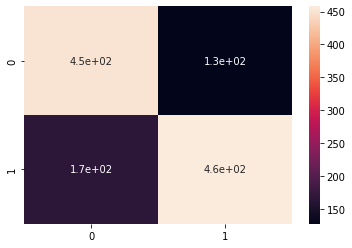



              precision    recall  f1-score   support

           0       0.73      0.78      0.75       578
           1       0.78      0.73      0.76       624

    accuracy                           0.76      1202
   macro avg       0.76      0.76      0.76      1202
weighted avg       0.76      0.76      0.76      1202

End Training.....




Decisiontree


Best Score: 
0.8315501655207538


Accuracy on Training set:  1.0


Accuracy on Test_set:  0.8560732113144759




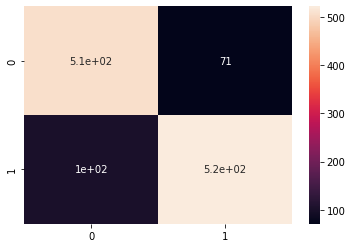



              precision    recall  f1-score   support

           0       0.83      0.88      0.85       578
           1       0.88      0.84      0.86       624

    accuracy                           0.86      1202
   macro avg       0.86      0.86      0.86      1202
weighted avg       0.86      0.86      0.86      1202

End Training.....




RandomForest


Best Score: 
0.9036363636363637


Accuracy on Training set:  1.0


Accuracy on Test_set:  0.9101497504159733




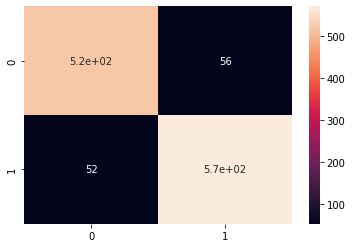



              precision    recall  f1-score   support

           0       0.91      0.90      0.91       578
           1       0.91      0.92      0.91       624

    accuracy                           0.91      1202
   macro avg       0.91      0.91      0.91      1202
weighted avg       0.91      0.91      0.91      1202

End Training.....




AdaBoost


Best Score: 
0.8326158645276293


Accuracy on Training set:  0.9054246966452534


Accuracy on Test_set:  0.8361064891846922




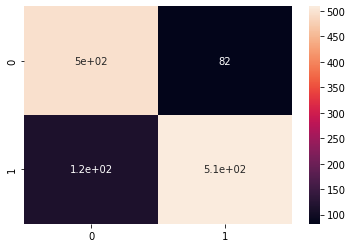



              precision    recall  f1-score   support

           0       0.81      0.86      0.83       578
           1       0.86      0.82      0.84       624

    accuracy                           0.84      1202
   macro avg       0.84      0.84      0.84      1202
weighted avg       0.84      0.84      0.84      1202

End Training.....




MultinomialNB


Best Score: 
0.6209823020117138


Accuracy on Training set:  0.6338329764453962


Accuracy on Test_set:  0.6073211314475874




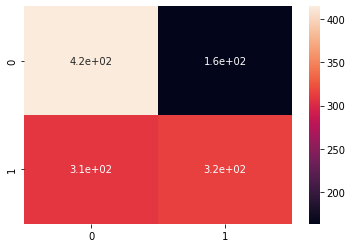



              precision    recall  f1-score   support

           0       0.57      0.72      0.64       578
           1       0.66      0.50      0.57       624

    accuracy                           0.61      1202
   macro avg       0.62      0.61      0.60      1202
weighted avg       0.62      0.61      0.60      1202

End Training.....




In [ ]:
""""
Description:
  Using Different types of models in GridSearchCV by cross_validating data 5 times
  
Output:
  Classification_Report
  Confusion Matrix
  HeatMap
  Accuracy
"""

models = {
  'Logistic_reg': LogisticRegression(),
  'Decisiontree': DecisionTreeClassifier(),
  'RandomForest':RandomForestClassifier(),
  'AdaBoost': AdaBoostClassifier(),
  'MultinomialNB':MultinomialNB(),
  
}

X_train, X_test, y_train, y_test = train_test_split(data_scale, y, test_size= 0.3, random_state= 42, shuffle=True)

for model_name, model in models.items():
  clf = GridSearchCV(model,param_grid={}, scoring='accuracy', cv=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('\n')
  print(model_name)

  print('\n')
  print('Best Score: ')
  print(clf.best_score_)

  print('\n')
  print('Accuracy on Training set: ',accuracy_score(y_train,clf.predict(X_train)))

  print('\n')
  print('Accuracy on Test_set: ', accuracy_score(y_test, y_pred))
  print('\n')

  cf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_mat, annot=True)
  plt.show()

  print('\n')

  print(classification_report(y_test, y_pred))
  print('End Training.....\n\n')

# Applying Convolutional Neural Network

In [ ]:
# Scale the data
X_scale = X/255

In [ ]:
print(X_scale.shape)
print(X_scale[0].shape)

(4004, 60, 60, 3)
(60, 60, 3)


In [ ]:
"""
Description:
  Applying CNN with using 4 Convo2D layers and 3 ANN layer
"""

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (60,60,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
"""
Overall Model Summary
"""
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0

In [ ]:
"""
Description: 
  Split the dataset into 70% training and 30% testing 
  Applying One hot encoding on y_train and y_test using keras
"""
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size= 0.3, random_state= 42, shuffle=True)

y_train_cat = np_utils.to_categorical(y_train, num_classes = 2)
y_test_cat = np_utils.to_categorical(y_test, num_classes = 2)

In [ ]:
"""
Description:
  Compile the model
  Optimizer: adam
  loss: binary_crossentropy (use for binary classification)
  metrics: accuracy (for model performance)
"""
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

hist = model.fit(X_train, y_train_cat,epochs=25)

Epoch 1/25
88/88 [==============================] - 13s 136ms/step - loss: 0.6596 - accuracy: 0.5967
Epoch 2/25
88/88 [==============================] - 12s 135ms/step - loss: 0.5272 - accuracy: 0.7498
Epoch 3/25
88/88 [==============================] - 12s 134ms/step - loss: 0.4172 - accuracy: 0.8148
Epoch 4/25
88/88 [==============================] - 12s 133ms/step - loss: 0.3424 - accuracy: 0.8515
Epoch 5/25
88/88 [==============================] - 12s 132ms/step - loss: 0.3044 - accuracy: 0.8672
Epoch 6/25
88/88 [==============================] - 12s 132ms/step - loss: 0.2865 - accuracy: 0.8837
Epoch 7/25
88/88 [==============================] - 12s 133ms/step - loss: 0.2836 - accuracy: 0.8851
Epoch 8/25
88/88 [==============================] - 12s 133ms/step - loss: 0.2608 - accuracy: 0.8994
Epoch 9/25
88/88 [==============================] - 12s 134ms/step - loss: 0.2585 - accuracy: 0.8961
Epoch 10/25
88/88 [==============================] - 12s 132ms/step - loss: 0.2393 - accura

In [ ]:
"""
Description:
  Evaluating the the model on test set 
"""
model.evaluate(X_test, y_test_cat)

38/38 [==============================] - 2s 37ms/step - loss: 0.1865 - accuracy: 0.9235


[0.18649226427078247, 0.9234609007835388]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
"""
Description:
  Convert the neural network probabilities into binary classes to evaluating the model by printing its classification_report
"""

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       578
           1       0.98      0.87      0.92       624

    accuracy                           0.92      1202
   macro avg       0.93      0.93      0.92      1202
weighted avg       0.93      0.92      0.92      1202



Text(0.5, 1.0, 'Training Accuracy and Training Loss')

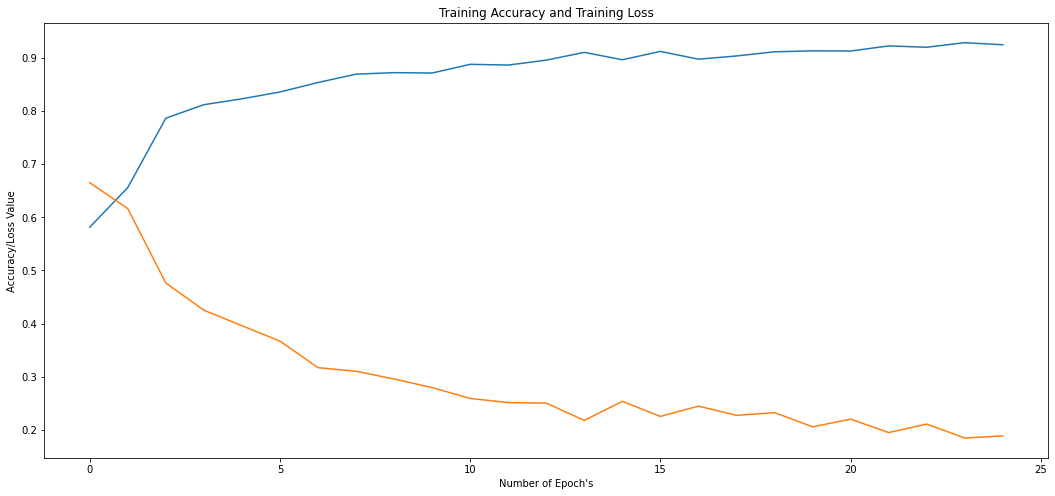

In [ ]:
"""
Plot the accuracy and loss observed in different epochs
"""

plt.figure(figsize = (18,8))
plt.plot(range(25), hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(25), hist.history['loss'], label = 'Training Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')

In [ ]:
"""
Description:
  Save the model in .h5 format
"""
model.save(r'/content/drive/MyDrive/Colab Notebooks/images/model_cell_images.h5')

In [ ]:
import pickle

with open('model.pickle','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://905b4335-fbd6-44d3-a266-598465c86f69/assets


# Conclusion:

## Preprocessing:
      Use Scaling technique on images
      
## LogisticRegression :
      75% Accuray

## DecisionTree :
     83% accuray but overfitting on training set

## Random Forest: 
     Overfit on dataset

## Adaboost: 

          83% accuracy and we can that it is performing much better than other because it is not overfitting on both training and test set

## CNN: 
      92% accuracy performing better than conventional Machine Learning Algorithms
